In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV




In [3]:
# Datos de ejemplo
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([5, 7, 9])

# Valores de alpha para regularización
alpha_values = np.linspace(0.01, 1.0, num=100)

# Coeficientes de Lasso y Ridge para diferentes valores de alpha
lasso_coefs = []
ridge_coefs = []


In [6]:
for alpha in alpha_values: #recorre todo el intervalo (0,1)
    lasso = Lasso(alpha=alpha)  # Regularización L1
    ridge = Ridge(alpha=alpha)  # Regularización L2
    
    lasso.fit(X, y)
    ridge.fit(X, y)
    
    lasso_coefs.append(lasso.coef_)
    ridge_coefs.append(ridge.coef_)

# Convertir en matrices numpy para trazar
lasso_coefs = np.array(lasso_coefs)
ridge_coefs = np.array(ridge_coefs)


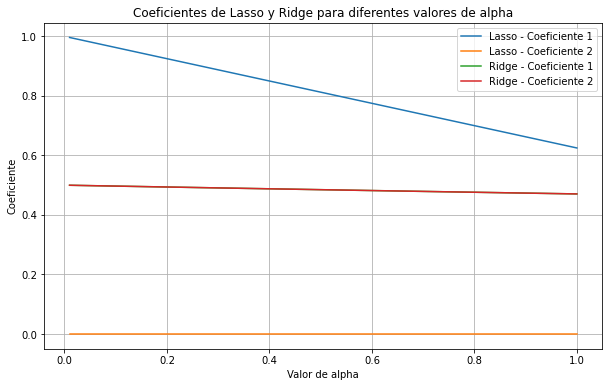

In [7]:

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, lasso_coefs[:, 0], label='Lasso - Coeficiente 1')
plt.plot(alpha_values, lasso_coefs[:, 1], label='Lasso - Coeficiente 2')
plt.plot(alpha_values, ridge_coefs[:, 0], label='Ridge - Coeficiente 1')
plt.plot(alpha_values, ridge_coefs[:, 1], label='Ridge - Coeficiente 2')
plt.xlabel('Valor de alpha')
plt.ylabel('Coeficiente')
plt.title('Coeficientes de Lasso y Ridge para diferentes valores de alpha')
plt.legend()
plt.grid(True)
plt.show()



In [8]:
# Imprimir los coeficientes finales para alpha = 0.1
print("Coeficientes finales Lasso (alpha=0.1):", lasso_coefs[9])
print("Coeficientes finales Ridge (alpha=0.1):", ridge_coefs[9])

Coeficientes finales Lasso (alpha=0.1): [0.9625 0.    ]
Coeficientes finales Ridge (alpha=0.1): [0.49689441 0.49689441]


Comparando con la regresión lineal

In [10]:
from sklearn.linear_model import LinearRegression



In [11]:
# Crear el objeto del modelo de regresión lineal
regression = LinearRegression()

# Entrenar el modelo con los datos
regression.fit(X, y)

LinearRegression()

In [13]:
coeficientes = regression.coef_
interseccion = regression.intercept_

print("Coeficientes:", coeficientes)
print("Intersección:", interseccion)

Coeficientes: [0.5 0.5]
Intersección: 3.500000000000001


Los coeficientes son $[.5,.5]$ para la regresión lineal; para L1 son $[.9625,0]$; y para L2 $[.4968,.4968]$. Es decir, los coeficientes con regresión simple y con regresión Ridge son muy similares, mientras que con regresión Lasso se elimina el segundo coeficiente. 

Regresión lineal:

$y = 0.5x_1 + 0.5x_2$

L1 Lasso:

$y = 0.9625x_1 + 0$

L2 Ridge:

$y = 0.49689441x_1 + 0.49689441x_2$


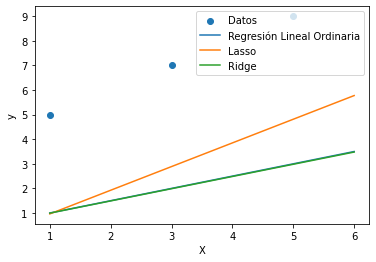

In [32]:
# Coeficientes de la regresión lineal ordinaria
coef_linreg = np.array([0.5, 0.5])

# Coeficientes de la regresión Lasso
coef_lasso = np.array([0.9625, 0.0])

# Coeficientes de la regresión Ridge
coef_ridge = np.array([0.49689441, 0.49689441])

# Generar puntos en el rango de los datos
x_range = np.linspace(np.min(X), np.max(X), 100)

# Calcular los valores y para cada modelo
y_linreg = coef_linreg[0] * x_range + coef_linreg[1]
y_lasso = coef_lasso[0] * x_range + coef_lasso[1]
y_ridge = coef_ridge[0] * x_range + coef_ridge[1]

# Graficar los puntos de datos
plt.scatter(X[:, 0], y, label='Datos')
plt.xlabel('X')
plt.ylabel('y')

# Graficar las líneas de los modelos
plt.plot(x_range, y_linreg, label='Regresión Lineal Ordinaria')
plt.plot(x_range, y_lasso, label='Lasso')
plt.plot(x_range, y_ridge, label='Ridge')

# Agregar leyenda y mostrar la gráfica
plt.legend()
plt.show()
